In [226]:
import kagglehub
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import kagglehub
path = kagglehub.dataset_download("smayanj/diabetes-risk-dataset")
print("Path to dataset files:", path)

100%|██████████| 1.98M/1.98M [00:00<00:00, 136MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/smayanj/diabetes-risk-dataset/versions/1


In [228]:
# Menampilkan isi folder dataset untuk memastikan nama file yang benar
dataset_folder = '/root/.cache/kagglehub/datasets/smayanj/diabetes-risk-dataset/versions/1'
for filename in os.listdir(dataset_folder):
    print(filename)

diabetes_risk_dataset.csv


In [229]:
file_path = os.path.join(dataset_folder,'diabetes_risk_dataset.csv')

In [230]:
 # Membaca file CSV yang ditemukan
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama dataset
print(df.head())


   age        bmi  glucose_level physical_activity_level  family_history  \
0   58  33.154816      71.049867                     low               0   
1   71  26.786882     125.964887                     low               0   
2   48  20.977319      61.876196                moderate               1   
3   34  27.959924     137.648074                     low               0   
4   62  28.304175      65.879564                moderate               0   

   smoker  at_risk_diabetes  
0       0                 1  
1       0                 0  
2       1                 0  
3       0                 0  
4       0                 0  


In [231]:
# Menampilkan nama-nama kolom dalam dataset
print(df.columns)

Index(['age', 'bmi', 'glucose_level', 'physical_activity_level',
       'family_history', 'smoker', 'at_risk_diabetes'],
      dtype='object')


In [232]:
x = df[['smoker','bmi','age']]
y = df['at_risk_diabetes']

In [233]:
x

,smoker,bmi,age
0,0,33.154816,58
1,0,26.786882,71
2,1,20.977319,48
3,0,27.959924,34
4,0,28.304175,62
...,...,...,...
99995,0,28.001900,74
99996,1,32.514707,26
99997,0,26.504374,71
99998,0,31.735351,62


In [234]:
y

,at_risk_diabetes
0,1
1,0
2,0
3,0
4,0
...,...
99995,0
99996,1
99997,0
99998,1


In [235]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state = 42)

In [236]:
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [237]:
accuracy = dtree.score(x_test, y_test)
print(f"Akurasi model: {accuracy*100:.2f}%")

Akurasi model: 87.91%


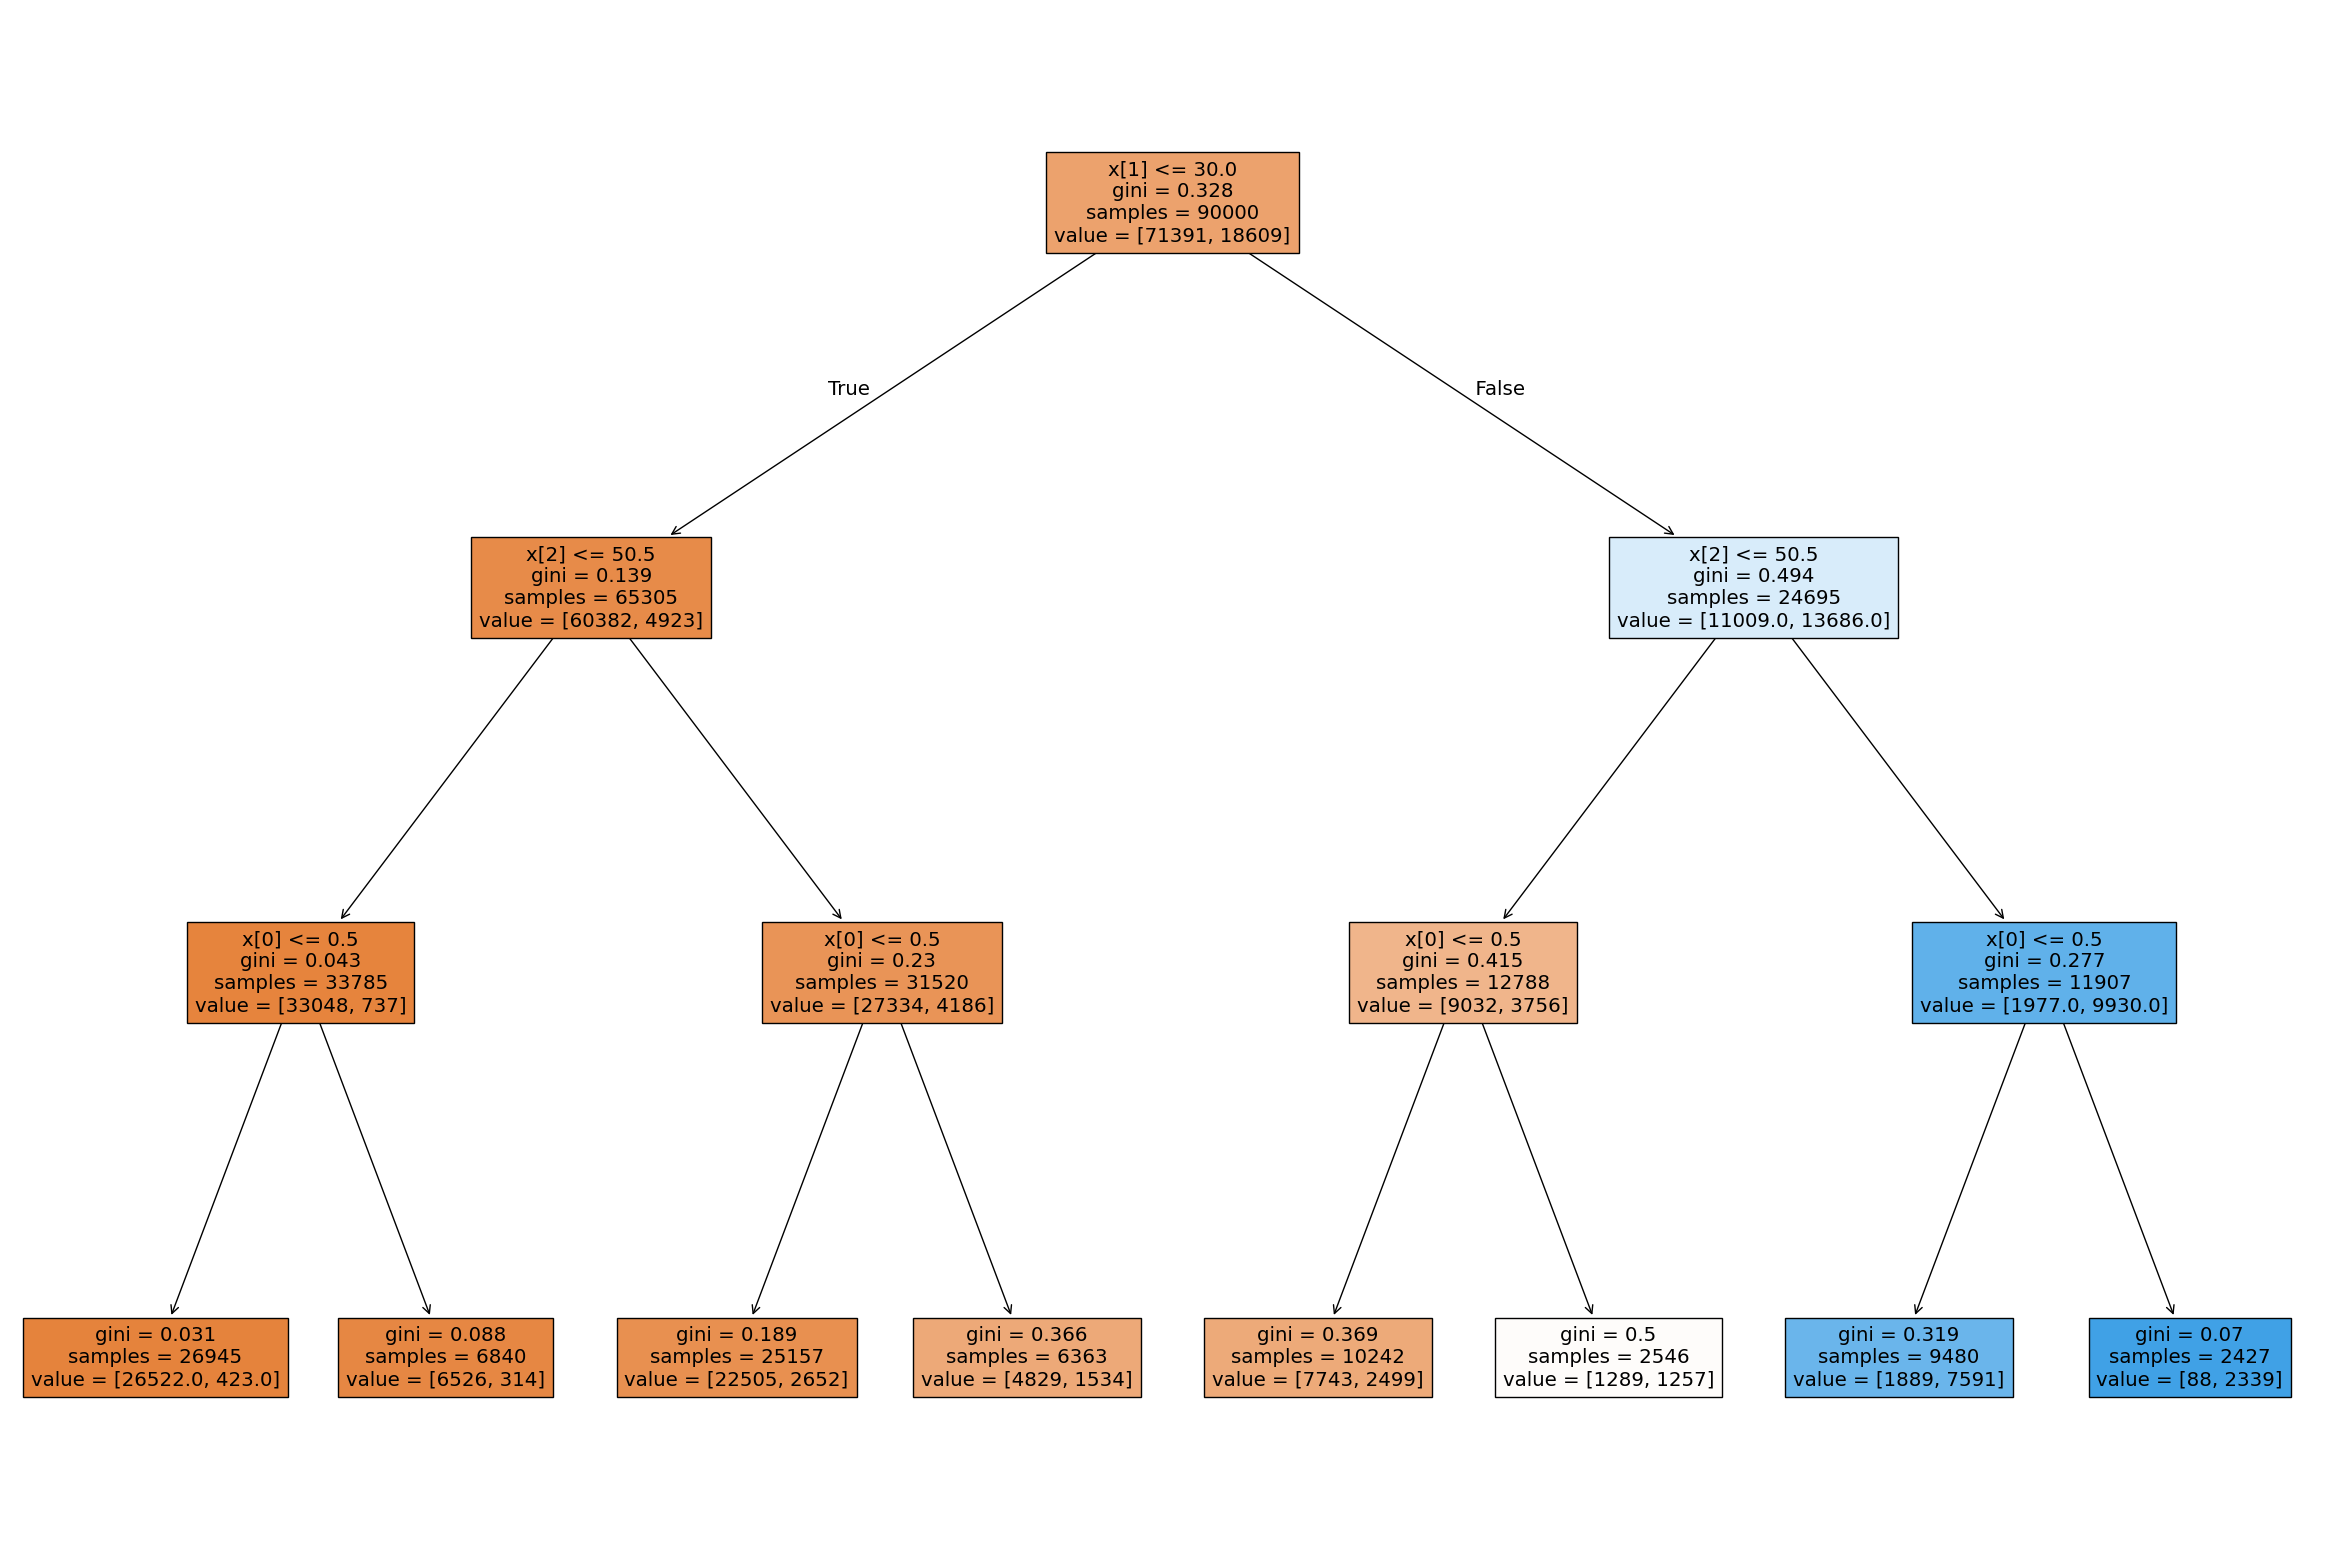

In [238]:
plt.figure(figsize=(30, 20))
plot_tree(dtree, filled=True)
plt.show()